In [1]:
# define a pytensor Op for our likelihood function
from pl_temp_fit import Exp_data_utils

import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import os
import json
import uuid
import numpy as np
from pl_temp_fit import config_utils
from pl_temp_fit import covariance_utils, generate_data_utils, fit_PL_utils

os.chdir('/rds/general/user/hy2120/home/clone_lowtemp_PL_MA/pl_temp_fit/') 
#os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

In [2]:
# if the data are in xlsx format convert them to csv, 
# hw changes dynamically with the respective expt file --HY 160524
import pandas as pd
import glob
from scipy import interpolate
import numpy as np

def from_xslx_to_csv(csv_name):
    try:
        #load excel file, but its called csv_name smh
        data = pd.read_excel(csv_name)
        #hw is in the first column
        hw_min = data.iloc[:, 0].min()
        hw_max = data.iloc[:, 0].max()
        hws = np.arange(hw_min,hw_max,0.01)

        y  = np.zeros((len(hws), len(data.columns)))
        y[:,0] = hws
        #store the interpolated stuff
        for i in range(1, len(data.columns)):
            f = interpolate.interp1d(data.iloc[:, 0], data.iloc[:, i], fill_value='extrapolate')
            y[:, i] = f(hws)

        data = pd.DataFrame(y, columns=data.columns)  
        data = data.transpose()
        data = data.rename(columns=data.iloc[0])[1:]
        # too many temps to process, specify every second one
 #       if data.shape[0]>12:
 #           data = data.iloc[range(0,data.shape[0],2),:]
        data.to_csv(f'{csv_name.replace(".xlsx",".csv")}')
        return f'{csv_name.replace(".xlsx",".csv")}'
    except Exception as e:
        print (f"Error processing {csv_name}: {e}")
        return None
    
xlsx_files = glob.glob('2023-12-12-Lowtemp-PL/*.xlsx')
# new excel files created with limited temps, this is what emcee will work on
for xlsx_file in xlsx_files:
    csv_name = from_xslx_to_csv(xlsx_file)
    print(csv_name)


2023-12-12-Lowtemp-PL/IDTBR.csv
2023-12-12-Lowtemp-PL/L8BO-noanneal.csv
2023-12-12-Lowtemp-PL/Y6-12mgml-100Canneal.csv
2023-12-12-Lowtemp-PL/IT4F.csv
2023-12-12-Lowtemp-PL/IEICO-4F-1ugml-soln.csv
2023-12-12-Lowtemp-PL/Y6-1ugml-soln.csv
2023-12-12-Lowtemp-PL/GSISO-1ugml-soln.csv
2023-12-12-Lowtemp-PL/IEICO-1ugml-soln.csv
2023-12-12-Lowtemp-PL/o-IDTBR-soln.csv
2023-12-12-Lowtemp-PL/L8BO.csv
2023-12-12-Lowtemp-PL/ITIC.csv
2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv
2023-12-12-Lowtemp-PL/Y6-DIO.csv
2023-12-12-Lowtemp-PL/IEICO4F.csv
2023-12-12-Lowtemp-PL/IT4F-DIO.csv
2023-12-12-Lowtemp-PL/GSISO.csv
2023-12-12-Lowtemp-PL/IEICO-cn.csv
2023-12-12-Lowtemp-PL/PYIT.csv
2023-12-12-Lowtemp-PL/IDTBR-DIB.csv
2023-12-12-Lowtemp-PL/Y6-DIB.csv
2023-12-12-Lowtemp-PL/L8BO-soln.csv
2023-12-12-Lowtemp-PL/ITIC-2ugml_soln.csv
2023-12-12-Lowtemp-PL/ITIC-DIO.csv
2023-12-12-Lowtemp-PL/IEICO4F-DIO.csv
2023-12-12-Lowtemp-PL/IT4F-soln.csv
2023-12-12-Lowtemp-PL/Y5-DIO.csv
2023-12-12-Lowtemp-PL/Y5-1ugml-CFTol.csv
2

In [13]:
# import the data and plot them
import importlib
import glob
csv_files = glob.glob('2023-12-12-Lowtemp-PL/*.csv')
for id,csv_file in enumerate(csv_files):
    print(id,csv_file)



0 2023-12-12-Lowtemp-PL/IT4F.csv
1 2023-12-12-Lowtemp-PL/PYIT.csv
2 2023-12-12-Lowtemp-PL/IDTBR-DIB.csv
3 2023-12-12-Lowtemp-PL/GSISO-1ugml-soln.csv
4 2023-12-12-Lowtemp-PL/o-IDTBR-soln.csv
5 2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv
6 2023-12-12-Lowtemp-PL/Y5-DIO.csv
7 2023-12-12-Lowtemp-PL/L8BO.csv
8 2023-12-12-Lowtemp-PL/ITIC-2ugml_soln.csv
9 2023-12-12-Lowtemp-PL/Y6-DIO.csv
10 2023-12-12-Lowtemp-PL/Y5.csv
11 2023-12-12-Lowtemp-PL/L8BO-soln.csv
12 2023-12-12-Lowtemp-PL/IEICO-cn.csv
13 2023-12-12-Lowtemp-PL/GSISO.csv
14 2023-12-12-Lowtemp-PL/L8BO-noanneal.csv
15 2023-12-12-Lowtemp-PL/IT4F-soln.csv
16 2023-12-12-Lowtemp-PL/Y6-DIB.csv
17 2023-12-12-Lowtemp-PL/IDTBR.csv
18 2023-12-12-Lowtemp-PL/IEICO-1ugml-soln.csv
19 2023-12-12-Lowtemp-PL/IT4F-DIO.csv
20 2023-12-12-Lowtemp-PL/ITIC.csv
21 2023-12-12-Lowtemp-PL/IEICO-4F-1ugml-soln.csv
22 2023-12-12-Lowtemp-PL/IEICO4F-DIO.csv
23 2023-12-12-Lowtemp-PL/Y5-1ugml-CFTol.csv
24 2023-12-12-Lowtemp-PL/Y6-1ugml-soln.csv
25 2023-12-12-Lowtemp-P

In [11]:
csv_name=csv_files[27]#18,10,14
print(csv_name)
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)

fig,ax = Exp_data_utils.plot_PL_data(Exp_data, temperature_list, hws,title="Experimental Data")

2023-12-12-Lowtemp-PL/Y6-12mgml-100Canneal.csv


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [43]:
# initialise parameters for the model

importlib.reload(config_utils)

(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_PL,
    sigma,
) = (6, 5, 0.005, 0.05,0.001)
fixed_parameters_dict = {
    "EX":{},
    "CT":{'off':1},  
    "D":{},
}
params_to_fit_init ={
    "EX":{"E":1.6,"sigma":0.001,"Li":7.8e-2,"Lo":0.11,"hO":0.159,"fosc":5},
    "CT":{},
    "D":{},
}
min_bounds = {
    "EX":{"E":1.5,"sigma":0.001,"Li":0.01,"Lo":0.03,"hO":0.1,"fosc":0.0001},
    "CT":{},
    "D":{},
}
max_bounds = {
    "EX":{"E":1.9,"sigma":0.03,"Li":0.2,"Lo":0.2,"hO":0.2,"fosc":5},
    "CT":{},
    "D":{},
}
# save the model config
model_config, test_id = config_utils.save_model_config(
    csv_name_PL=csv_name,
    Temp_std_err=Temp_std_err,
    hws_std_err=hws_std_err,
    relative_intensity_std_error_PL= relative_intensity_std_error_PL,
    temperature_list_PL=temperature_list,
    hws_PL=hws,
    sigma=sigma,
    fixed_parameters_dict=fixed_parameters_dict,
    params_to_fit_init=params_to_fit_init,
    min_bounds=min_bounds,
    max_bounds=max_bounds,
    num_iteration_max_likelihood = 5,
    coeff_spread = 0.5,
    nsteps = 10000,
    num_coords = 32,
    database_folder = "fit_experimental_emcee_PL/fit_data_base/",
    data_folder="fit_experimental_emcee_PL/fit_data/",

)

size of hw is (95,)
size of temperature_list is (7,)


In [44]:
importlib.reload(config_utils)
model_config,model_config_save = config_utils.load_model_config(test_id, database_folder = "fit_experimental_emcee_PL/fit_data_base/")
fixed_parameters_dict, params_to_fit, min_bound, max_bound = config_utils.get_dict_params(model_config_save)

model_config['temperature_list_PL'] = temperature_list
model_config['hws_PL'] = hws

save_folder = model_config_save['save_folder']
print(save_folder)

fit_experimental_emcee_PL/fit_data//2024_05_26/Y6-12mgml-100Canneal/aad66035-0725-4408-98e7-62703ecec3ac


shape of mean value plot is (95, 7)


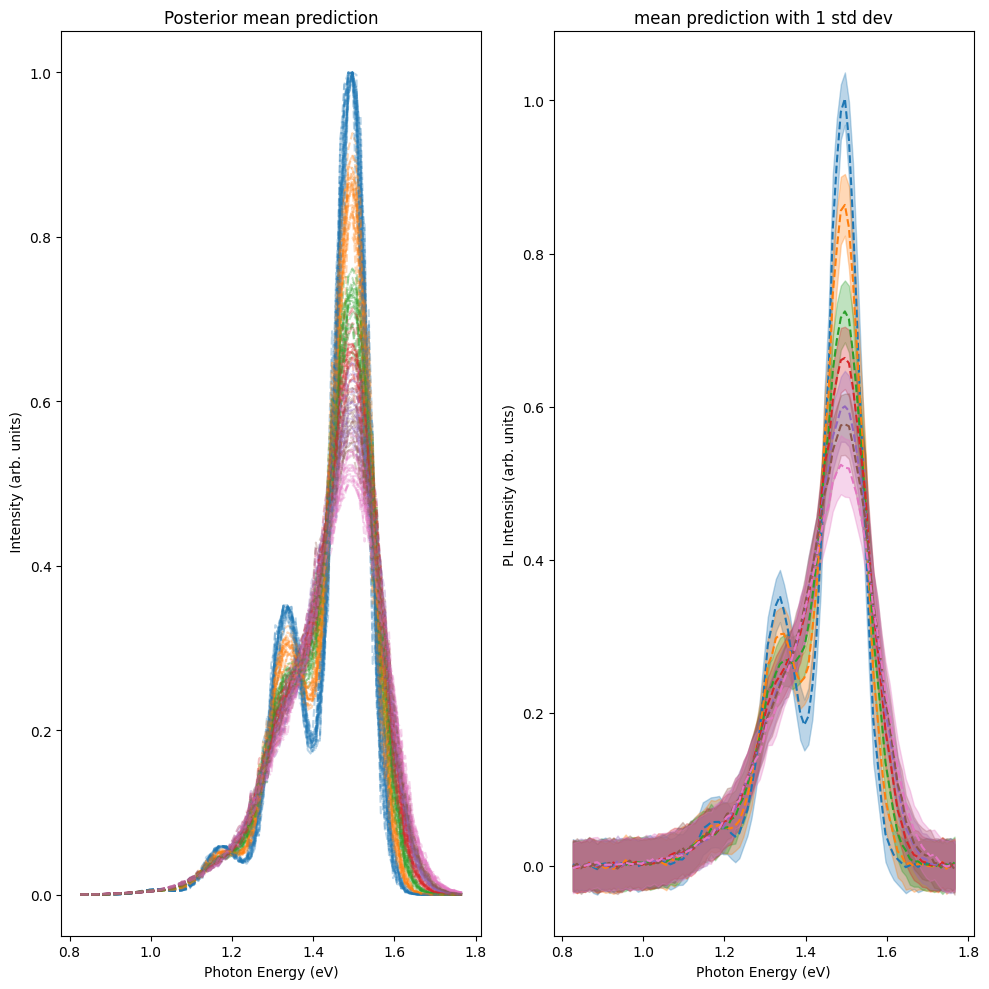

In [45]:
import importlib
importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
# get the variance of the data and plot it

co_var_mat_PL, variance_PL = (
    covariance_utils.plot_generated_data_PL(
        save_folder,
        model_config,
        savefig=True,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit=params_to_fit_init,
    )
)

In [46]:

import importlib
from pl_temp_fit import fit_PL_utils
importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
#importlib.reload(fit_EL_utils)
importlib.reload(fit_PL_utils)

soln = fit_PL_utils.get_maximum_likelihood_estimate(
    Exp_data,
    co_var_mat_PL,
    model_config,
    save_folder,
    num_coords=1,
    fixed_parameters_dict=fixed_parameters_dict,
    params_to_fit=params_to_fit_init,
    min_bound=min_bounds,
    max_bound=max_bounds,
)

running the minimisation
step 0
[1.52357419e+00 1.00000000e-03 1.88136061e-01 1.86582940e-01
 1.54171039e-01 4.94053258e+00]
Maximum likelihood estimates:
  EX_E = 1.524
  EX_sigma = 0.001
  EX_Li = 0.188
  EX_Lo = 0.187
  EX_hO = 0.154
  EX_fosc = 4.941
Maximum log likelihood: 7796.105536414607


(<Figure size 2000x500 with 7 Axes>,
 array([<Axes: title={'center': 'temperature=90.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=120.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=160.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=200.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=240.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=260.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=300.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>],
       dtype=object))

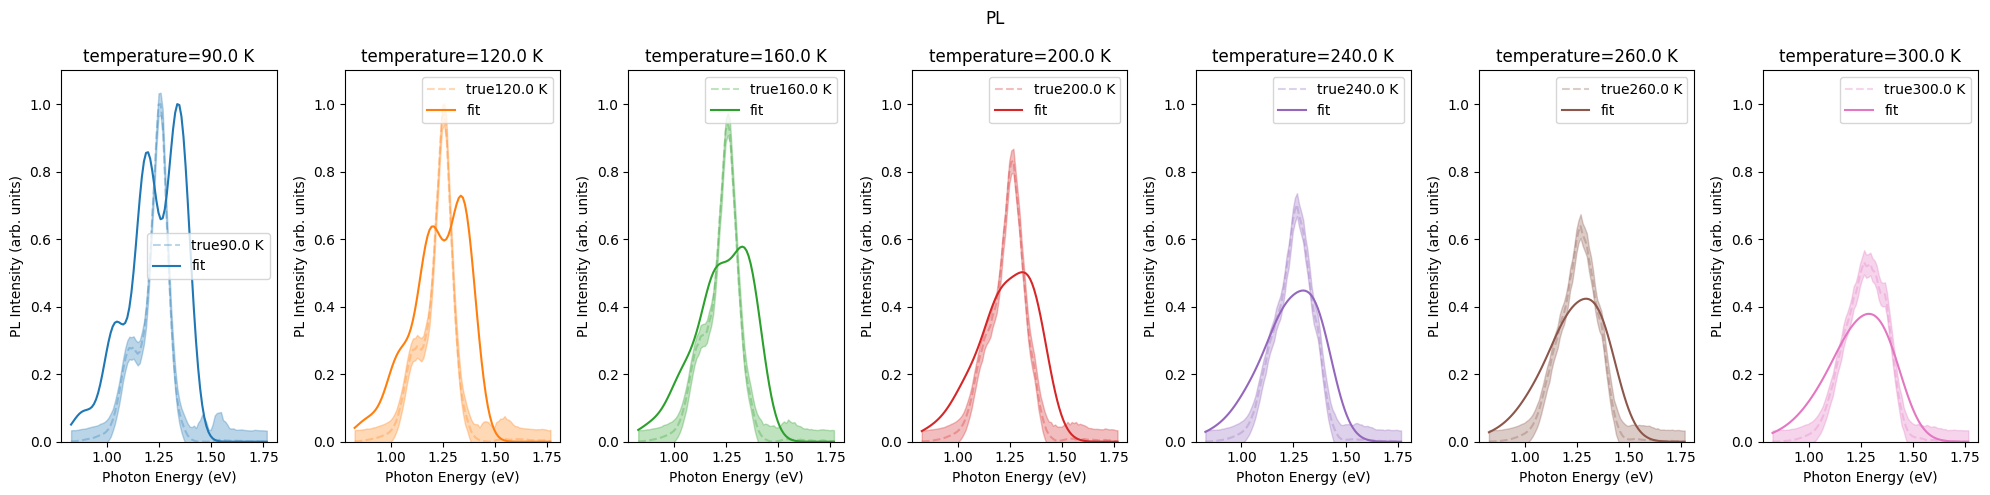

In [47]:
importlib.reload(fit_PL_utils)

true_parameters = fit_PL_utils.get_param_dict(params_to_fit_init,soln.x)
fit_PL_utils.plot_exp_data_with_variance(
    temperature_list,
    hws,
    variance_PL,
    save_folder,
    fixed_parameters_dict,
    true_parameters,
    Exp_data,
)

shape of mean value plot is (95, 7)


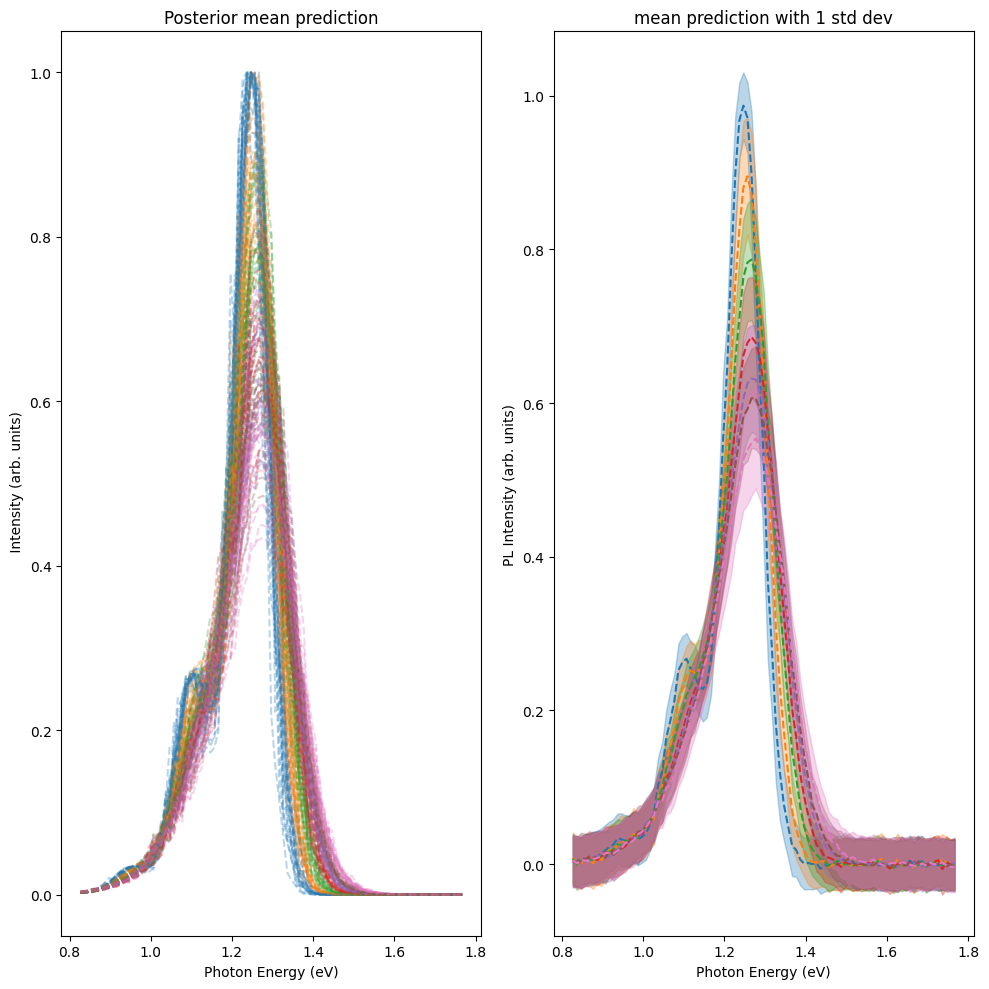

In [13]:

co_var_mat_PL, variance_PL = (
    covariance_utils.plot_generated_data_PL(
        save_folder,
        model_config,
        savefig=True,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit=true_parameters,
    )
)

In [18]:
importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
importlib.reload(fit_PL_utils)

fit_PL_utils.run_sampler_parallel(
    save_folder,
    Exp_data,
    co_var_mat_PL,
    params_to_fit_init,
    fixed_parameters_dict,
    min_bounds,
    max_bounds,
    model_config,
    nsteps=5,
    coeff_spread=1,
    num_coords = 32,
    num_processes=4,
)


Initial size: 0


You must install the tqdm library to use progress indicators with emcee
/rds/general/user/hy2120/home/anaconda3/envs/pl_temp_fit/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


multi process took 13.0 seconds


In [ ]:
import h5py
h5py is None

## submitting jobs to the hpc

In [20]:
# import the data and plot them
import importlib
import glob
csv_files = glob.glob('2023-12-12-Lowtemp-PL/*.csv')
for id,csv_file in enumerate(csv_files):
    print(id,csv_file)


0 2023-12-12-Lowtemp-PL/IT4F.csv
1 2023-12-12-Lowtemp-PL/PYIT.csv
2 2023-12-12-Lowtemp-PL/IDTBR-DIB.csv
3 2023-12-12-Lowtemp-PL/GSISO-1ugml-soln.csv
4 2023-12-12-Lowtemp-PL/o-IDTBR-soln.csv
5 2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv
6 2023-12-12-Lowtemp-PL/Y5-DIO.csv
7 2023-12-12-Lowtemp-PL/L8BO.csv
8 2023-12-12-Lowtemp-PL/ITIC-2ugml_soln.csv
9 2023-12-12-Lowtemp-PL/Y6-DIO.csv
10 2023-12-12-Lowtemp-PL/Y5.csv
11 2023-12-12-Lowtemp-PL/L8BO-soln.csv
12 2023-12-12-Lowtemp-PL/IEICO-cn.csv
13 2023-12-12-Lowtemp-PL/GSISO.csv
14 2023-12-12-Lowtemp-PL/L8BO-noanneal.csv
15 2023-12-12-Lowtemp-PL/IT4F-soln.csv
16 2023-12-12-Lowtemp-PL/Y6-DIB.csv
17 2023-12-12-Lowtemp-PL/IDTBR.csv
18 2023-12-12-Lowtemp-PL/IEICO-1ugml-soln.csv
19 2023-12-12-Lowtemp-PL/IT4F-DIO.csv
20 2023-12-12-Lowtemp-PL/ITIC.csv
21 2023-12-12-Lowtemp-PL/IEICO-4F-1ugml-soln.csv
22 2023-12-12-Lowtemp-PL/IEICO4F-DIO.csv
23 2023-12-12-Lowtemp-PL/Y5-1ugml-CFTol.csv
24 2023-12-12-Lowtemp-PL/Y6-1ugml-soln.csv
25 2023-12-12-Lowtemp-P

2023-12-12-Lowtemp-PL/Y5.csv


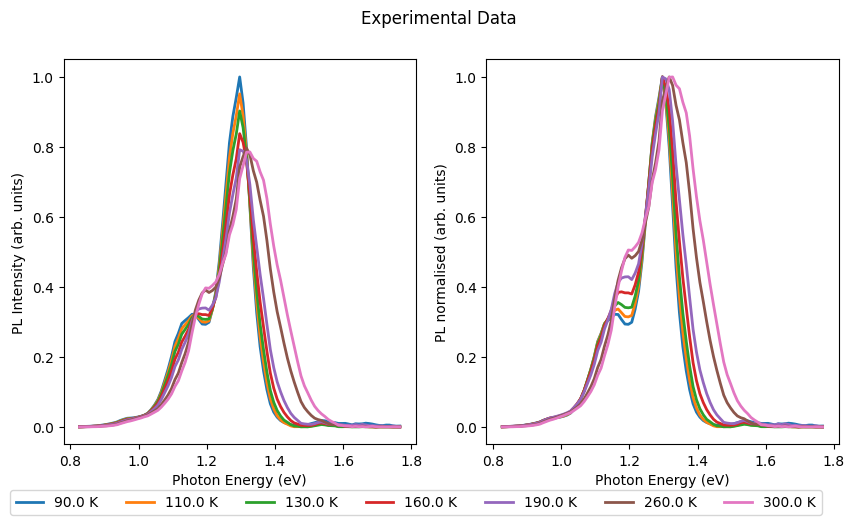

In [52]:
csv_name=csv_files[10]#18,10,14
print(csv_name)
Exp_data, temperature_list_PL, hws_PL = Exp_data_utils.read_data(csv_name)

fig,ax = Exp_data_utils.plot_PL_data(Exp_data, temperature_list_PL, hws_PL,title="Experimental Data")

In [21]:
# initialise parameters for the model

importlib.reload(config_utils)

(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_PL,
    sigma,
) = (6, 5, 0.005, 0.05,0.001)
fixed_parameters_dict = {
    "EX":{},
    "CT":{'off':1},  
    "D":{},
}
params_to_fit_init ={
    "EX":{"E":1.4,"sigma":0.01,"Li":0.04,"Lo":0.03,"hO":0.1,"fosc":5},
    "CT":{},
    "D":{},
}
min_bounds = {
    "EX":{"E":1.2,"sigma":0.001,"Li":0.01,"Lo":0.01,"hO":0.1,"fosc":0.0001},
    "CT":{},
    "D":{},
}
max_bounds = {
    "EX":{"E":1.5,"sigma":0.03,"Li":0.2,"Lo":0.2,"hO":0.2,"fosc":5},
    "CT":{},
    "D":{}
}
# save the model config
model_config, test_id = config_utils.save_model_config(
    csv_name_PL=csv_name,
    Temp_std_err=Temp_std_err,
    hws_std_err=hws_std_err,
    relative_intensity_std_error_PL= relative_intensity_std_error_PL,
    temperature_list_PL=temperature_list_PL,
    hws_PL=hws_PL,
    sigma=sigma,
    fixed_parameters_dict=fixed_parameters_dict,
    params_to_fit_init=params_to_fit_init,
    min_bounds=min_bounds,
    max_bounds=max_bounds,
    num_iteration_max_likelihood = 5,
    coeff_spread = 0.5,
    nsteps = 10000,
    num_coords = 32,
    database_folder = "fit_experimental_emcee_PL/fit_data_base/",
    data_folder="fit_experimental_emcee_PL/fit_data/",
)
print(test_id)

size of hw is (95,)
size of temperature_list is (7,)
c3f5fcd0-cb16-4cf7-8646-9c7b6787f53f


In [108]:
print(test_id)

e14d19e5-5ae2-4f41-96b9-5af54329ab57


In [ ]:
%run src/pl_temp_fit/scripts/run_PL_sampling.py --model_config_id {model_config_id}

In [54]:
model_config_id = test_id
results_name = csv_name.replace('.csv','').split('/')[-1]
sh_name = f"Run_EMCEE_{results_name}.sh"
script="#!/bin/bash \n"+\
    "#PBS -l walltime=010:59:01 \n"+\
    "#PBS -l select=1:ncpus=32:mem=80gb:avx=true \n"+\
    " \n"+\
    "cd /rds/general/user/hy2120/home/pl_temp_fit/ \n"+\
    "module load anaconda3/personal \n"+ \
    "source activate pl_temp_fit     \n"+\
    f"python src/pl_temp_fit/scripts/run_PL_sampling.py --model_config_id {model_config_id} \n"#${'PBS_ARRAY_INDEX'}#f"#PBS -J 1-{16} \n"+\
#print(script) 
with open(f'HPC_bash_script/{sh_name}', 'wb') as f:
    f.write( bytes(script, 'utf-8'))  
script= f"qsub  -e ./cache -o ./cache HPC_bash_script/{sh_name}"#submit to HPC
!{script}

9487230.pbs


## analyse the results

In [26]:
import glob
import numpy as np
from pl_temp_fit import Emcee_utils, config_utils


list_model_config=[]
json_files = glob.glob('fit_experimental_emcee_PL/fit_data_base/*.json')
for id,json_file in enumerate(json_files):
    try:
        model_config, model_config_save = config_utils.load_model_config(json_file.split('/')[-1].replace('.json',''), database_folder = "fit_experimental_emcee_PL/fit_data_base/")
    except Exception as e:
        print(e)
        #if os.path.exists(json_file):
        #    os.remove(json_file)
        continue
    sampler_h5 = model_config_save['save_folder']+"/sampler.h5"
    if os.path.exists(sampler_h5):
        print(id,json_file)
        
        filename = model_config_save['save_folder'] + "/sampler.h5"
        try: 
            reader = Emcee_utils.hDFBackend_2(filename, name="multi_core")
            distribution = reader.get_chain(flat=True)
            chi_sq, p_values,dfs = [],[],[]
        except:
            reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
            distribution = reader.get_chain(flat=True)
        
        true_parameters=list(np.median(distribution,axis=0))
        model_config_save['median'] = [f"{x:.3f}" for x in true_parameters]          
        model_config_save['num_iteration'] = reader.iteration  
        log_prob = reader.get_log_prob( flat=True)  
        model_config_save['max_log_prob'] = np.max(log_prob)
        
        list_model_config.append(model_config_save)
    #else:
            #os.remove(json_file)
           # for file in glob.glob(model_config_save['save_folder']+'/*'):
            #    os.remove(file)
            #os.rmdir(model_config_save['save_folder'])

    

0 fit_experimental_emcee_PL/fit_data_base/362ca25d-168c-48b8-a230-847f22a31e48.json
1 fit_experimental_emcee_PL/fit_data_base/29edc227-02b7-490f-82be-32eb0090f88f.json
2 fit_experimental_emcee_PL/fit_data_base/01aad4a8-9c9a-476a-ac18-884bf64b3b83.json
3 fit_experimental_emcee_PL/fit_data_base/71877506-f6cd-43f0-a764-e3a387de0eaa.json
4 fit_experimental_emcee_PL/fit_data_base/99186cf3-5deb-4a43-9b52-9d51176614b0.json
5 fit_experimental_emcee_PL/fit_data_base/a6819d5c-e127-4a91-8c87-4dd6daf41574.json
6 fit_experimental_emcee_PL/fit_data_base/1a6a4837-5646-4214-b66e-9f2c42611611.json
7 fit_experimental_emcee_PL/fit_data_base/19029cee-daa4-4cd8-bea6-260e87c0e38c.json
9 fit_experimental_emcee_PL/fit_data_base/10330402-146e-46c3-a9de-a2db2a39987c.json
10 fit_experimental_emcee_PL/fit_data_base/30d1e3aa-c95b-473f-b023-146dfab208d4.json
11 fit_experimental_emcee_PL/fit_data_base/269b44ac-fd6d-472d-8abc-fb8f22ee1991.json
12 fit_experimental_emcee_PL/fit_data_base/32f50262-bfc4-4bbb-8b2d-944eac9

In [27]:
import pandas as pd
df_all = pd.DataFrame(list_model_config)
df_all

,Temp_std_err,hws_std_err,relative_intensity_std_error_PL,relative_intensity_std_error_EL,sigma,save_folder,csv_name_PL,csv_name_EL,date,test_id,...,params_to_fit_init,min_bounds,max_bounds,num_iteration_max_likelihood,coeff_spread,nsteps,num_coords,median,num_iteration,max_log_prob
0,2,0.005,0.02,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_05_26...,2023-12-12-Lowtemp-PL/Y6-DIB.csv,,2024_05_26,362ca25d-168c-48b8-a230-847f22a31e48,...,"{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.04, '...","{'EX': {'E': 1.2, 'sigma': 0.001, 'Li': 0.01, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.351, 0.012, 0.069, 0.079, 0.145, 2.804]",10000,-190.162114
1,2,0.005,0.02,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_05_26...,2023-12-12-Lowtemp-PL/Y6-12mgml-100Canneal.csv,,2024_05_26,29edc227-02b7-490f-82be-32eb0090f88f,...,"{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.04, '...","{'EX': {'E': 1.2, 'sigma': 0.001, 'Li': 0.01, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.379, 0.018, 0.058, 0.096, 0.146, 2.587]",9925,-292.893487
2,2,0.005,0.02,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_05_26...,2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv,,2024_05_26,01aad4a8-9c9a-476a-ac18-884bf64b3b83,...,"{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.04, '...","{'EX': {'E': 1.2, 'sigma': 0.001, 'Li': 0.01, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.352, 0.012, 0.061, 0.087, 0.160, 2.644]",10000,-147.729415
3,2,0.005,0.02,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_05_26...,2023-12-12-Lowtemp-PL/Y6-12mgml-100Canneal.csv,,2024_05_26,71877506-f6cd-43f0-a764-e3a387de0eaa,...,"{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.04, '...","{'EX': {'E': 1.2, 'sigma': 0.001, 'Li': 0.01, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.386, 0.018, 0.057, 0.105, 0.147, 2.600]",10000,-304.440756
4,2,0.005,0.02,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_05_26...,2023-12-12-Lowtemp-PL/L8BO-noanneal.csv,,2024_05_26,99186cf3-5deb-4a43-9b52-9d51176614b0,...,"{'EX': {'E': 1.4, 'sigma': 0.01, 'Li': 0.04, '...","{'EX': {'E': 1.2, 'sigma': 0.001, 'Li': 0.01, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.404, 0.015, 0.010, 0.092, 0.101, 3.121]",10000,-352.547683
5,2,0.005,0.02,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_05_26...,2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv,,2024_05_26,a6819d5c-e127-4a91-8c87-4dd6daf41574,...,"{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.04, '...","{'EX': {'E': 1.2, 'sigma': 0.001, 'Li': 0.01, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.358, 0.014, 0.058, 0.091, 0.161, 2.629]",9900,-142.767249
6,2,0.005,0.02,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_05_26...,2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv,,2024_05_26,1a6a4837-5646-4214-b66e-9f2c42611611,...,"{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.04, '...","{'EX': {'E': 1.2, 'sigma': 0.001, 'Li': 0.01, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.342, 0.011, 0.070, 0.077, 0.145, 2.633]",10000,-143.783426
7,2,0.005,0.02,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_05_26...,2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv,,2024_05_26,19029cee-daa4-4cd8-bea6-260e87c0e38c,...,"{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.04, '...","{'EX': {'E': 1.2, 'sigma': 0.001, 'Li': 0.01, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.339, 0.012, 0.071, 0.074, 0.145, 2.452]",10000,-144.210209
8,2,0.005,0.02,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_05_26...,2023-12-12-Lowtemp-PL/Y6-15mgml-85Canneal.csv,,2024_05_26,10330402-146e-46c3-a9de-a2db2a39987c,...,"{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.04, '...","{'EX': {'E': 1.2, 'sigma': 0.001, 'Li': 0.01, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.358, 0.014, 0.058, 0.092, 0.161, 2.679]",10000,-140.599880
9,2,0.005,0.02,0.001,0.001,fit_experimental_e

## plots

Initial size: 10000
(319936,)
(319936,)


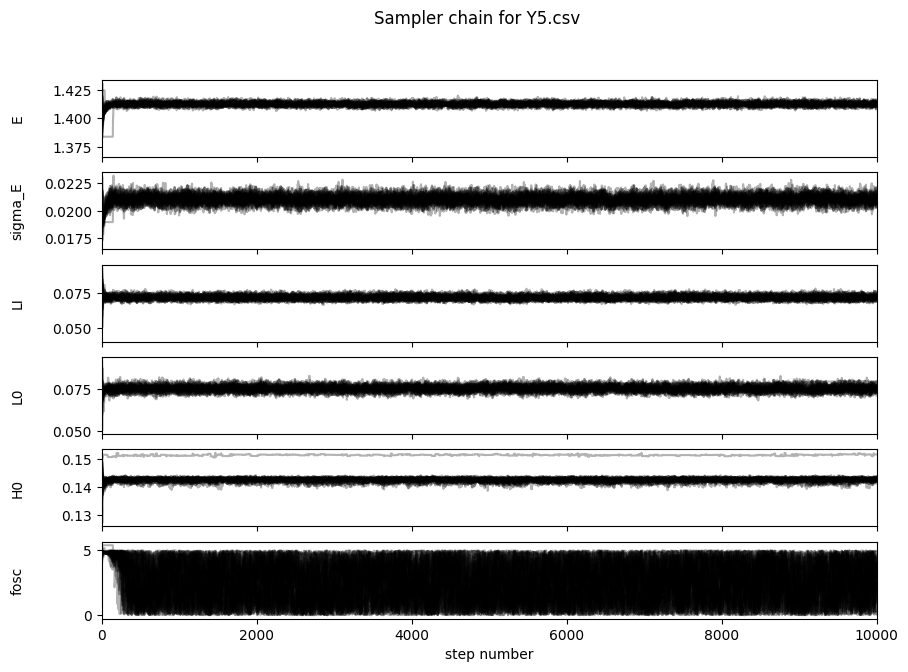

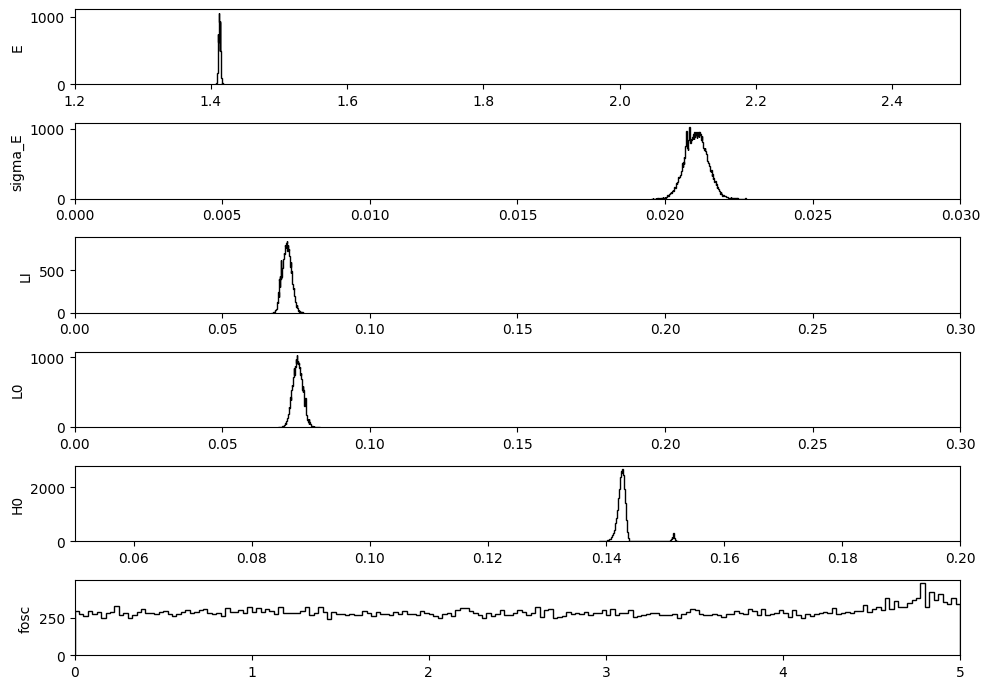

In [38]:
# reload sampler from file
index = 11
filename = df_all['save_folder'][index] + "/sampler.h5"
csv_name = df_all['csv_name_PL'][index]
model_config, model_config_save = config_utils.load_model_config(df_all['test_id'][index], database_folder = "fit_experimental_emcee_PL/fit_data_base/")
try: 
    reader = Emcee_utils.hDFBackend_2(filename, name="multi_core")
    distribution = reader.get_chain(flat=True)
except:
    reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
    distribution = reader.get_chain(flat=True)
print("Initial size: {0}".format(reader.iteration))
#load data and plot the relevant histograms
flat_samples = reader.get_log_prob(discard=2, thin=1, flat=True)
print(flat_samples.shape)
#plt.hist(flat_samples[flat_samples>-1e3], 100, color="k", histtype="step")
#plt.xlabel("log probability")
#plt.ylabel("Number of samples")
#plt.xlim(-100,0)
#plt.title(' log probability distribution')
#plt.show()
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = reader.get_chain()
labels = ["E", "sigma_E", "LI", "L0", "H0","fosc"]
ndim = len(labels)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
fig.suptitle(f"Sampler chain for {csv_name.split('/')[-1]}")
fig.show()
#flat_samples.shape
distribution = reader.get_chain(discard=1000, thin=5, flat=True)
true_parameters=list(np.mean(distribution,axis=0))
print(flat_samples.shape)
fig, axes = plt.subplots(6, figsize=(10, 7))
axes_xlim = [[1.2,2.5],[0,0.03],[0,0.3],[0,0.3],[0.05,0.2],[0,5]]
for i in range(ndim):
    ax = axes[i]
    ax.hist(distribution[:, i], 200, color="k", histtype="step")
    ax.set_ylabel(labels[i])
    ax.set_xlim(axes_xlim[i])
fig.tight_layout()
fig.show()



Distribution shape for index 8: (57600, 6)
Distribution shape for index 12: (57600, 6)


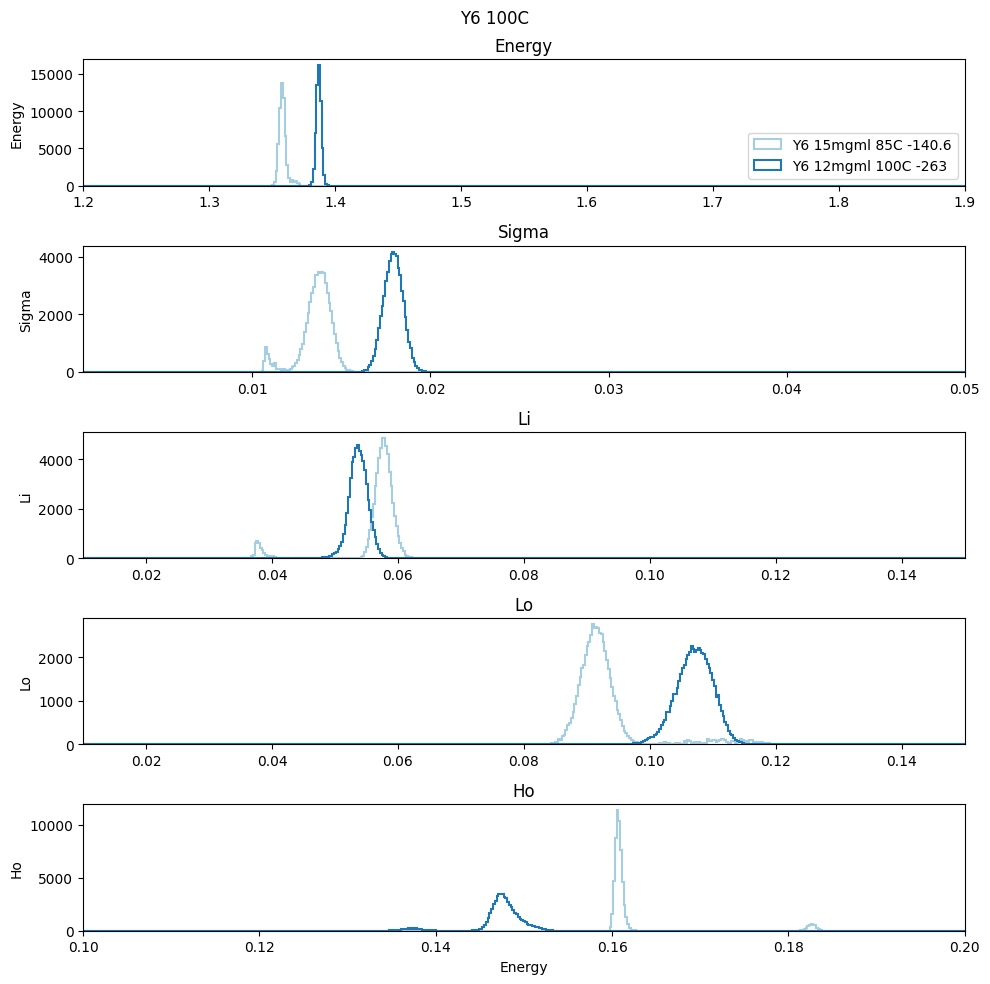

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define your indices and their labels
index_labels = {
 #   0: "L8BO neat film",
 #   6: "L8BO no-anneal",
 #   19: "L8BO solution",

    8: "Y6 15mgml 85C -140.6",
    12: "Y6 12mgml 100C -263",
 #   16: "Y6 solution",
 #   28: "Y6 DIB",
 #   2: "Y6 DIO",
 #   9: "Y5 neat film",
 #   8: "Y5 DIO",
 #   1: "GSISO neat film",
 #   3: "IT4F neat film",
 #   4: "IEICO neat film",
 #   7: "IDTBR DIB",
 #   21: "IEICO-4F",
 #   22: "IT4F DIO",
 #   12: "ITIC neat film",
 #   24: "ITIC DIO",
 #   26: "IEICO cn",
 #   27: "IDTBR neat film",
 #   28: "Y6 DIB",    
 #   12: "ITIC neat film",
}

# Create a color palette
palette = sns.color_palette("Paired", len(index_labels)) #"Paired", 
colors = palette.as_hex()

# Specify labels and fixed x-axis ranges for each plot, corresponding to your parameters
parameter_labels = ["Energy", "Sigma", "Li", "Lo", "Ho"]
axes_xlim = [
    [1.2, 1.9],   # Energy
    [0.0005, 0.05],  # Sigma
    [0.01, 0.15],  # Li
    [0.01, 0.15],  # Lo
    [0.1, 0.2]   # Ho
]

fig, axes = plt.subplots(5, figsize=(10, 10), sharex=False)  # Remove sharex=True

for index, color in zip(index_labels.keys(), colors):
    filename = df_all['save_folder'][index] + "/sampler.h5"
    try:
        reader = Emcee_utils.hDFBackend_2(filename, name="multi_core")
        distribution = reader.get_chain(flat=True)
    except:
        reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
        distribution = reader.get_chain(flat=True)

    # Get the desired samples after discarding and thinning
    distribution = reader.get_chain(discard=1000, thin=5, flat=True)
    true_parameters = list(np.mean(distribution, axis=0))
    print(f"Distribution shape for index {index}: {distribution.shape}")

    # Plot each parameter
    for i, ax in enumerate(axes):
        param_data = distribution[:, i]
        bins = np.linspace(axes_xlim[i][0], axes_xlim[i][1], 500)  # Static bins

        ax.hist(param_data, bins=bins, color=color, histtype="step", linewidth=1.5, label=index_labels[index] if i == 0 else "")
        ax.set_xlim(axes_xlim[i])
        ax.set_ylabel(parameter_labels[i])
        ax.set_title(parameter_labels[i])
        if i == 0:  # Only add the legend to the last subplot to avoid clutter
            ax.legend(loc='lower right')
            
axes[-1].set_xlabel("Energy")
fig.suptitle('Y6 100C')
fig.tight_layout(h_pad=1.0)  # Adjust padding between subplots for clarity
plt.show()


2023-12-12-Lowtemp-PL/Y5.csv fit_experimental_emcee_PL/fit_data//2024_05_26/Y5/32f50262-bfc4-4bbb-8b2d-944eac998a8c
shape of mean value plot is (95, 7)


(<Figure size 2000x500 with 7 Axes>,
 array([<Axes: title={'center': 'temperature=90.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=110.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=130.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=160.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=190.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=260.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=300.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>],
       dtype=object))

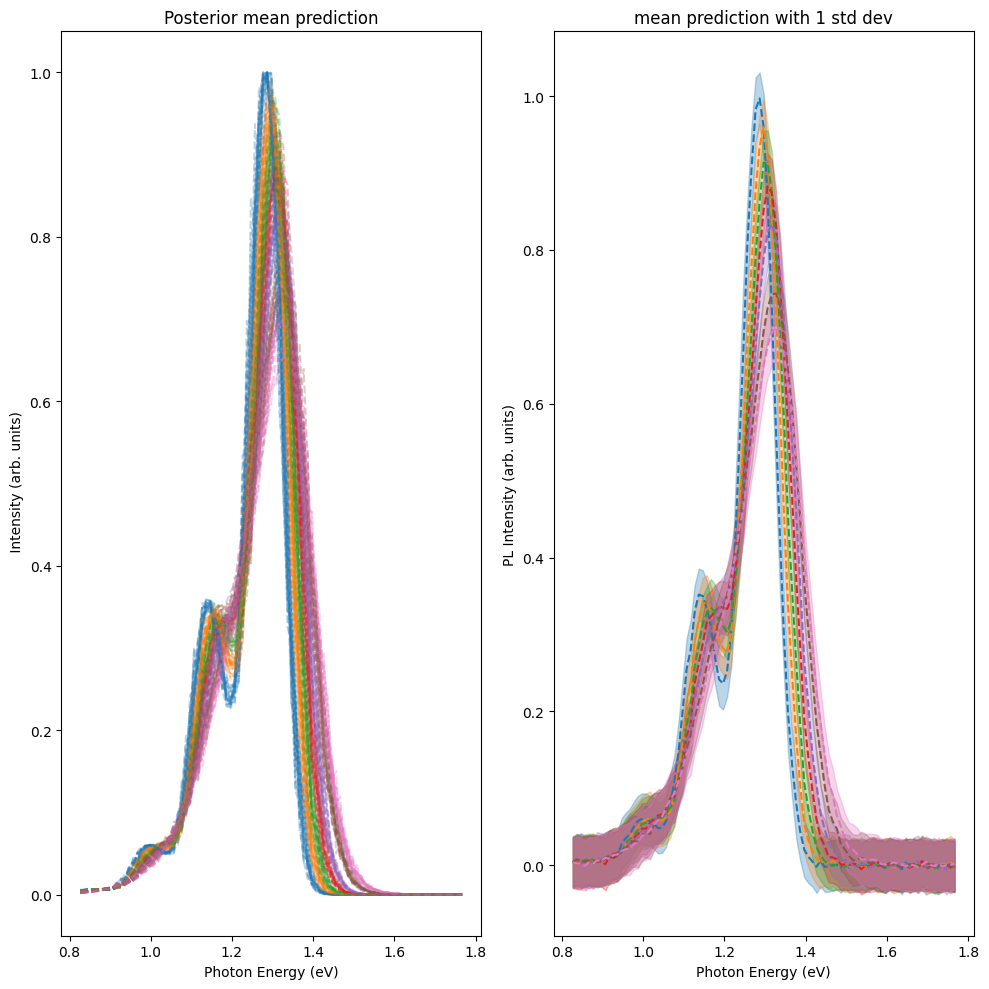

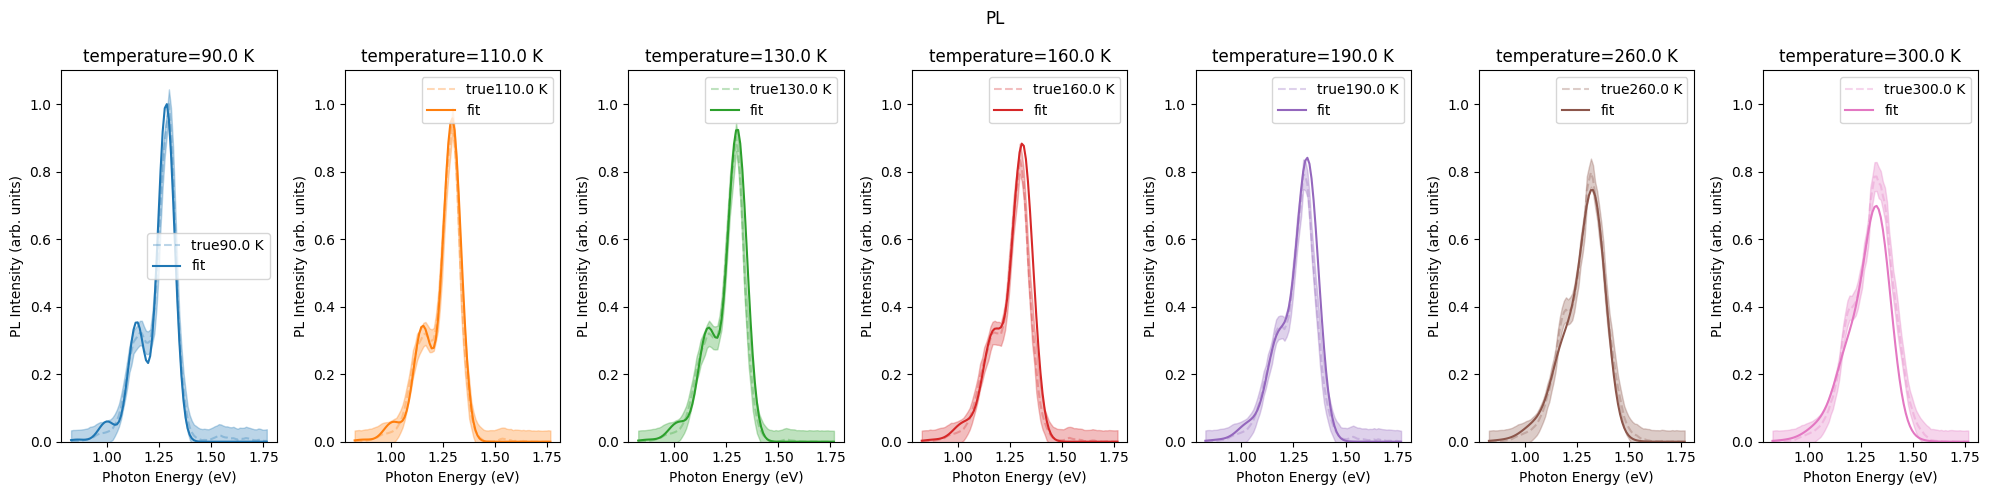

In [39]:
# add noise to the data and plot it now with the fitted parameters
#plot posterior predictive
#need to hws=hws_PL from previous analysis cell
import importlib
importlib.reload(config_utils)
importlib.reload(fit_PL_utils)


save_folder = model_config_save['save_folder']
print(csv_name,save_folder)

Exp_data, temperature_list_PL, hws_PL = Exp_data_utils.read_data(csv_name)
true_parameters_mean=list(np.mean(distribution,axis=0)) # if averaging the params
true_parameters_last=distribution[-1,:] # if getting the last true_param

model_config['temperature_list_PL'] = temperature_list_PL
model_config['hws_PL'] = hws_PL

true_parameters=fit_PL_utils.get_param_dict(params_to_fit_init, true_parameters_mean)

#fig,ax = Exp_data_utils.plot_PL_data(Exp_data, temperature_list_PL, hws_PL,title="Experimental Data")

co_var_mat_PL, variance_PL = (
    covariance_utils.plot_generated_data_PL(
        save_folder,
        model_config,
        savefig=True,
        fixed_parameters_dict=true_parameters,
        params_to_fit=true_parameters,
)

)

fit_PL_utils.plot_exp_data_with_variance(
    temperature_list_PL,
    hws_PL,
    variance_PL,
    save_folder,
    fixed_parameters_dict,
    true_parameters,
    Exp_data,
)



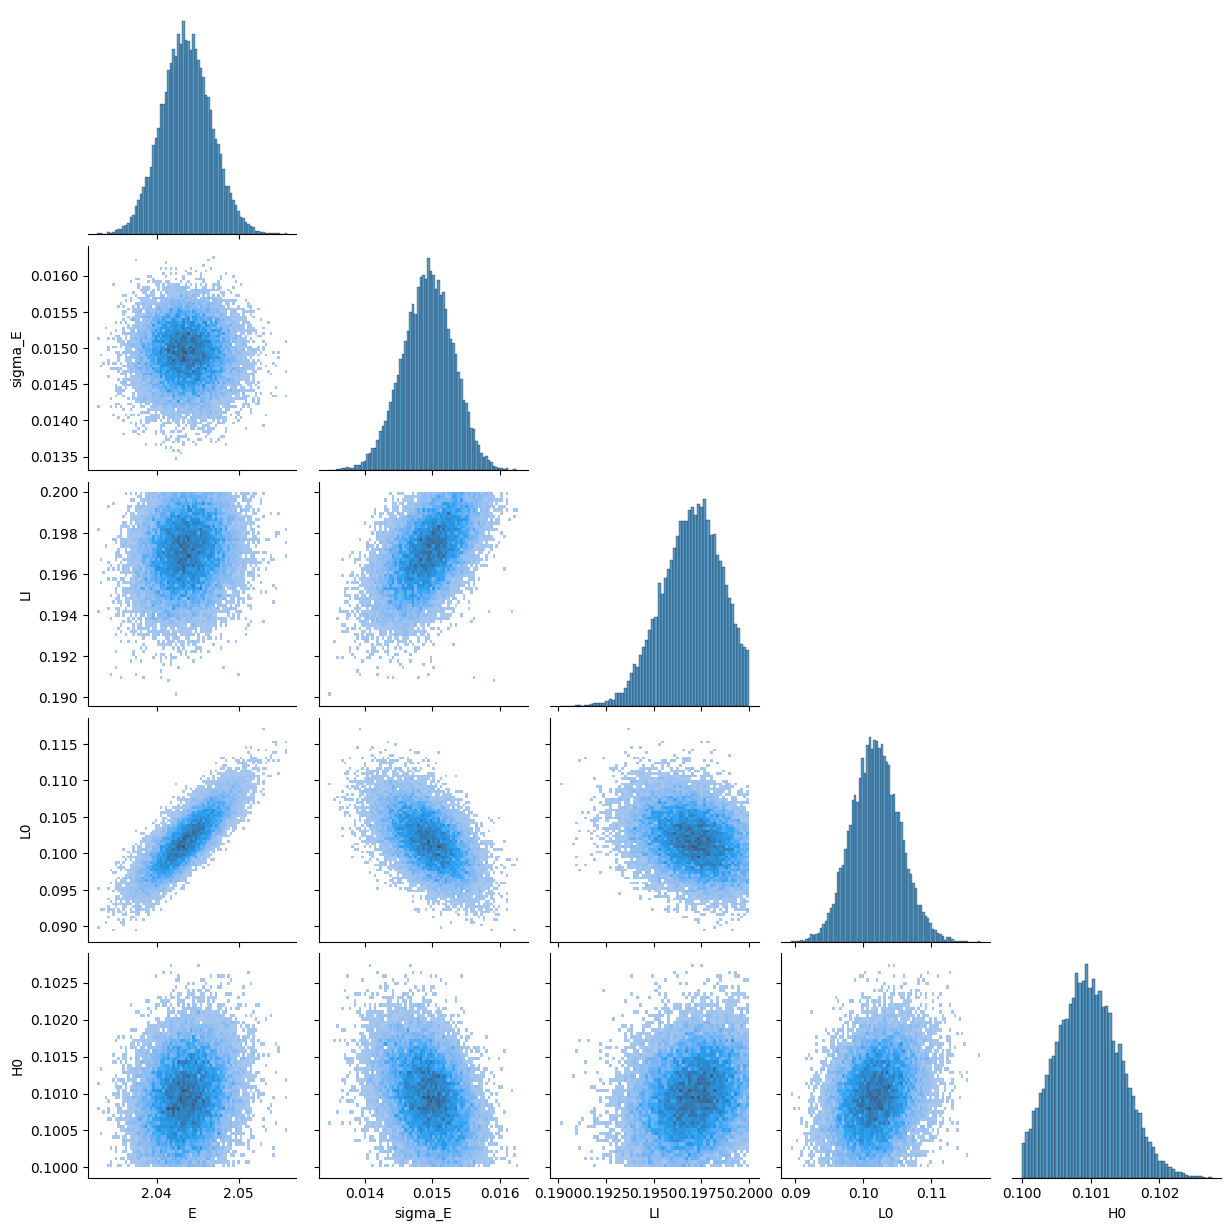

In [92]:
import seaborn as sns
samples = reader.get_chain(discard=1000, thin=15, flat=True)
df_samples = pd.DataFrame(samples, columns=labels)
g = sns.pairplot(df_samples, kind="hist", corner=True)